In [ ]:
#load and prepare the data
import pandas as pd
import numpy as np

def prepareData():
  train_data = pd.read_csv("pendigits-tra.csv", header= None)
  test_data = pd.read_csv("pendigits-tes.csv", header= None)
  x_train = train_data.iloc[:, 0:16]
  y_train = train_data[16]
  x_test = test_data.iloc[:, 0:16]
  y_test = test_data[16]

  return np.array(x_train), np.array(y_train), np.array(x_test), np.array(y_test)
x_train,y_train,x_test,y_test=prepareData()
prepareData()

(array([[ 47, 100,  27, ...,  90,  40,  98],
        [  0,  89,  27, ...,   2, 100,   6],
        [  0,  57,  31, ...,  25,  16,   0],
        ...,
        [100,  98,  60, ...,   0,   0,   5],
        [ 59,  65,  91, ...,   1, 100,   0],
        [  0,  78,  29, ...,  36, 100,  40]]),
 array([8, 2, 1, ..., 5, 1, 7]),
 array([[ 88,  92,   2, ...,  65, 100, 100],
        [ 80, 100,  18, ...,  61,  56,  98],
        [  0,  94,   9, ..., 100,  18,  92],
        ...,
        [ 56, 100,  27, ...,  93,  38,  93],
        [ 19, 100,   0, ...,  97,  10,  81],
        [ 38, 100,  37, ...,  26,  65,   0]]),
 array([8, 8, 8, ..., 0, 0, 4]))

In [ ]:
#Information about the data distribution
def dataInfo():
  x_train,y_train,x_test,y_test=prepareData()
  print(f'Training set shape: {x_train.shape}')
  print(f'Test set shape: {x_test.shape}')
  unique, count = np.unique(y_train, return_counts=True)
  print(f'Training distribution: {dict(zip(unique, count))}')
  unique, count = np.unique(y_test, return_counts=True)
  print(f'Testing distribution: {dict(zip(unique, count))}')
dataInfo()

Training set shape: (7494, 16)
Test set shape: (3498, 16)
Training distribution: {0: 780, 1: 779, 2: 780, 3: 719, 4: 780, 5: 720, 6: 720, 7: 778, 8: 719, 9: 719}
Testing distribution: {0: 363, 1: 364, 2: 364, 3: 336, 4: 364, 5: 335, 6: 336, 7: 364, 8: 336, 9: 336}


In [ ]:
#Apply scaling
from sklearn.preprocessing import MinMaxScaler

def dataScaling(x_train, x_test):
  scaler = MinMaxScaler()
  x_train = scaler.fit_transform(x_train)
  x_test = scaler.transform(x_test)

  return x_train, x_test
dataScaling(x_train, x_test)

(array([[0.47, 1.  , 0.27, ..., 0.9 , 0.4 , 0.98],
        [0.  , 0.89, 0.27, ..., 0.02, 1.  , 0.06],
        [0.  , 0.57, 0.31, ..., 0.25, 0.16, 0.  ],
        ...,
        [1.  , 0.98, 0.6 , ..., 0.  , 0.  , 0.05],
        [0.59, 0.65, 0.91, ..., 0.01, 1.  , 0.  ],
        [0.  , 0.78, 0.29, ..., 0.36, 1.  , 0.4 ]]),
 array([[0.88, 0.92, 0.02, ..., 0.65, 1.  , 1.  ],
        [0.8 , 1.  , 0.18, ..., 0.61, 0.56, 0.98],
        [0.  , 0.94, 0.09, ..., 1.  , 0.18, 0.92],
        ...,
        [0.56, 1.  , 0.27, ..., 0.93, 0.38, 0.93],
        [0.19, 1.  , 0.  , ..., 0.97, 0.1 , 0.81],
        [0.38, 1.  , 0.37, ..., 0.26, 0.65, 0.  ]]))

In [ ]:

#plot dataset
import matplotlib.pyplot as plt

def plotDataset(X, y, title=''):
  for label in np.unique(y):
    plt.scatter(X[y == label, 0], X[y == label, 1], label=label)

  plt.title(title)
  plt.legend()
  plt.show()


In [ ]:

def plotModels(models, title = '', xlabel = '', ylabel = ''):
  for i in models:
    plt.bar(i[0], i[1])

  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()

In [ ]:
#Feature Selection (ANOVA)
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(k,  model = None):

  X_total = np.concatenate((x_train, x_test), axis=0)
  Y_total = np.concatenate((y_train, y_test), axis=0)
  chi_squ = SelectKBest(score_func=f_classif, k= k)
  new_dataset=chi_squ.fit_transform(X_total, Y_total)
  train_row = int(np.size(x_train, 0))
  test_row = int(np.size(x_test, 0))
  total_row = train_row + test_row
  x_train_reduced = new_dataset[:train_row, :]
  x_test_reduced = new_dataset[train_row:total_row, :]

  if model == "MLP":
    accuracy_mlp = MLP(x_train_reduced,x_test_reduced)
    return accuracy_mlp
  elif model == "tree":
    acc_tree = decision_tree(x_train_reduced,x_test_reduced)
    return acc_tree
  elif model == "gradient":
    acc_GB = GB(x_train_reduced,x_test_reduced)
    return acc_GB


  elif model == None:
    return x_train_reduced, x_test_reduced

In [ ]:

#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def decision_tree(x_train,x_test):
  tree_clf = DecisionTreeClassifier(random_state=rs).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)

  return accuracy_tree

In [ ]:

#Gradient Boost
from sklearn.ensemble import GradientBoostingClassifier

def GB(x_train, x_test , learning_rate=0.1 ,n_estimators=100 , max_depth=3):
  GB_clf = GradientBoostingClassifier(learning_rate=learning_rate,n_estimators=n_estimators, max_depth=max_depth, random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)

  return accuracy_GB

In [ ]:
#Update Baseline

def update_baseline(models):
  acc_baseline = models[0][1]
  acc_1 = models[1][1]
  acc_2 = models[2][1]
  acc_3 = models[3][1]
  if (acc_baseline < acc_1 or  acc_baseline < acc_2 or  acc_baseline < acc_3):
    if acc_1 > acc_2:
      if acc_1 > acc_3:
        acc_baseline = acc_1
      else :
        acc_baseline = acc_3
    else:
      acc_baseline = acc_2

  return acc_baseline


Training set shape: (7494, 16)
Test set shape: (3498, 16)
Training distribution: {0: 780, 1: 779, 2: 780, 3: 719, 4: 780, 5: 720, 6: 720, 7: 778, 8: 719, 9: 719}
Testing distribution: {0: 363, 1: 364, 2: 364, 3: 336, 4: 364, 5: 335, 6: 336, 7: 364, 8: 336, 9: 336}


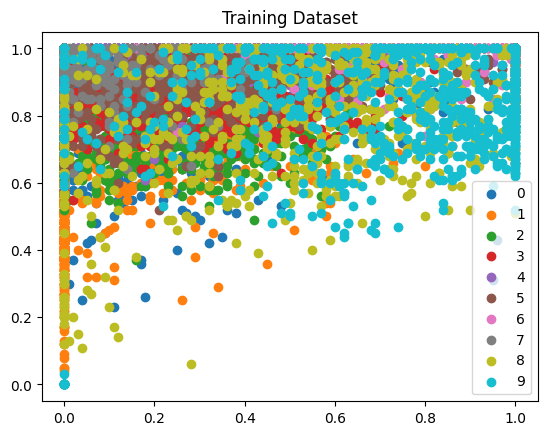

In [ ]:

dataInfo()
#scaling
x_train, x_test = dataScaling(x_train, x_test)
#plot
plotDataset(x_train, y_train, 'Training Dataset')

In [ ]:

#Global Variables
acc_baseline = []
rs = 0

In [ ]:
#baseline performance

In [ ]:
#Decision Tree


tree_baseline = tree_acc_1 = decision_tree(x_train,x_test)
print('Accuracy of Decision Tree: ', tree_baseline)
acc_baseline.append(['Decision tree', tree_baseline])


#Gradient Boost


GB_baseline = gb_acc_1 = GB(x_train ,x_test )
print('Accuracy of Gradient Boos: ',  GB_baseline)
acc_baseline.append(['Gradient Boost',  GB_baseline])

Accuracy of Decision Tree:  0.9213836477987422
Accuracy of Gradient Boos:  0.9625500285877644


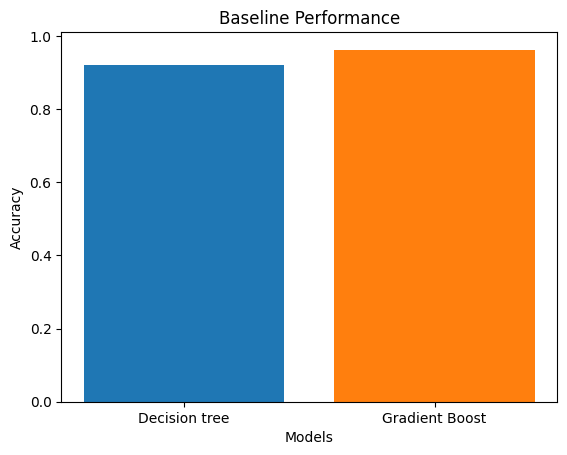

In [ ]:
plotModels(acc_baseline, 'Baseline Performance', 'Models', 'Accuracy')


In [ ]:
#feature selection

Accuracy of Decision Tree with 5 features: 0.7724413950829045
Accuracy of Decision Tree with 7 features: 0.8662092624356775
Accuracy of Decision Tree with 10 features: 0.888507718696398

Updated baseline accuracy =  0.9213836477987422




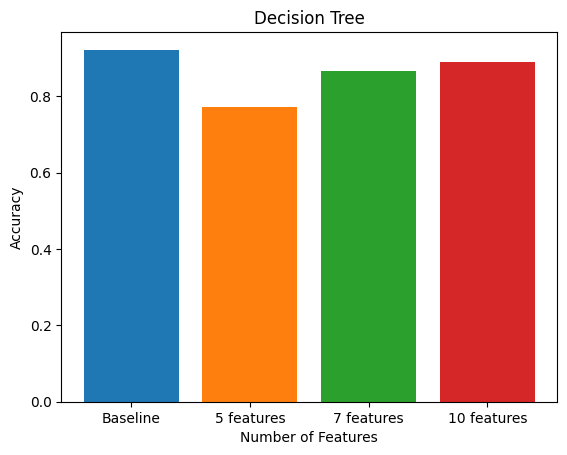

In [ ]:
#decision tree

acc_tree = []
acc_tree.append(['Baseline', tree_baseline])
for i in [5, 7, 10]:
  tree_acc = feature_selection(i, "tree")
  print(f'Accuracy of Decision Tree with {i} features:', tree_acc)
  acc_tree.append([f'{i} features', tree_acc])
#Update baseline
tree_update_baseline = tree_acc_2 = update_baseline(acc_tree)
print("\nUpdated baseline accuracy = ", tree_update_baseline)
print('\n')
plotModels(acc_tree, 'Decision Tree', 'Number of Features', 'Accuracy')

[['Baseline', 0.9213836477987422], ['2', 0.9139508290451687], ['3', 0.9150943396226415], ['4', 0.9093767867352773]]

Updated baseline accuracy =  0.9213836477987422


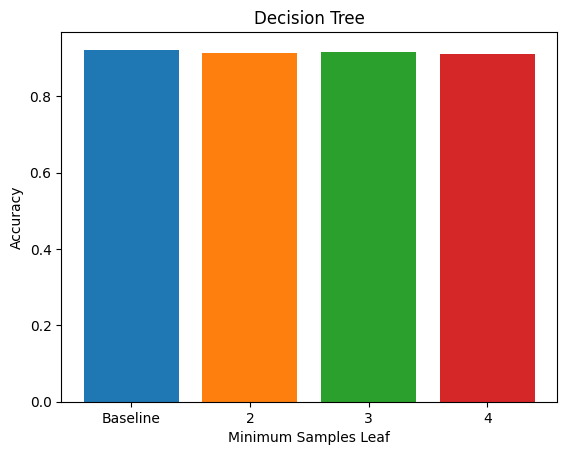

In [ ]:
#Hyperparameter: Minimum Samples Leaf
tree_min_sam = []
tree_min_sam.append(['Baseline', tree_update_baseline])
for i in range(2,5):
  tree_clf = DecisionTreeClassifier(random_state=rs, min_samples_leaf=i).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)
  tree_min_sam.append([f'{i}', accuracy_tree])

print(tree_min_sam)
#Update baseline
tree_update_baseline = tree_acc_3 = update_baseline(tree_min_sam)
print("\nUpdated baseline accuracy = ", tree_update_baseline)

plotModels(tree_min_sam, 'Decision Tree', 'Minimum Samples Leaf', 'Accuracy')

Accuracy of Gradient Boost with 5 features: 0.8370497427101201
Accuracy of Gradient Boost with 7 features: 0.9205260148656375
Accuracy of Gradient Boost with 10 features: 0.9408233276157805

Updated baseline accuracy =  0.9625500285877644




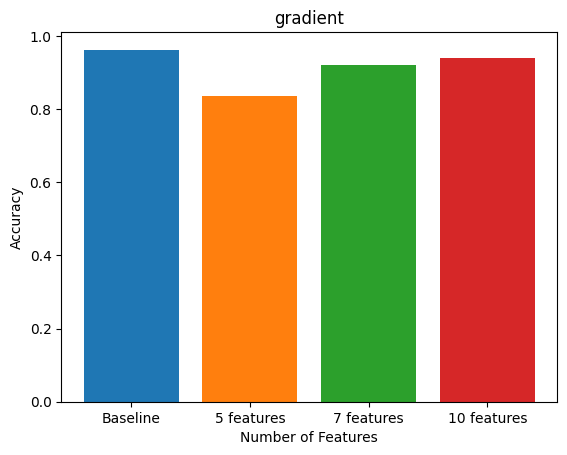

In [ ]:
#Gradient Boost


acc_GB = []
acc_GB.append(['Baseline', GB_baseline])
for i in [5, 7, 10]:
  GB_acc = feature_selection(i, "gradient")
  print(f'Accuracy of Gradient Boost with {i} features:', GB_acc)
  acc_GB.append([f'{i} features', GB_acc])

#Update baseline
GB_update_baseline = gb_acc_2 = update_baseline(acc_GB)
print("\nUpdated baseline accuracy = ", GB_update_baseline)
print('\n')
plotModels(acc_GB, 'gradient', 'Number of Features', 'Accuracy')

[['Baseline', 0.9213836477987422], ['5', 0.76357918810749], ['6', 0.824757004002287], ['7', 0.8727844482561463]]

Updated baseline accuracy =  0.9213836477987422


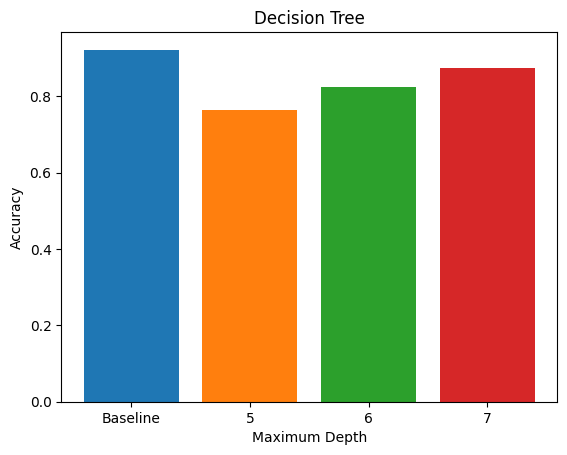

In [ ]:
#Decision Tree

#Hyperparameter: Max Depth
tree_max_dep = []
tree_max_dep.append(['Baseline', tree_update_baseline])
for i in range(5,8):
  tree_clf = DecisionTreeClassifier(random_state=rs, max_depth=i).fit(x_train, y_train)
  y_pred_tree = tree_clf.predict(x_test)
  accuracy_tree = accuracy_score(y_test, y_pred_tree)
  tree_max_dep.append([f'{i}', accuracy_tree])

print(tree_max_dep)
#Update baseline
tree_update_baseline = update_baseline(tree_max_dep)
print("\nUpdated baseline accuracy = ", tree_update_baseline)

plotModels(tree_max_dep, 'Decision Tree', 'Maximum Depth', 'Accuracy')

[['Baseline', 0.9625500285877644], ['0.01', 0.8727844482561463], ['0.19', 0.9656946826758147], ['0.4', 0.7950257289879932]]

Updated baseline accuracy =  0.9656946826758147


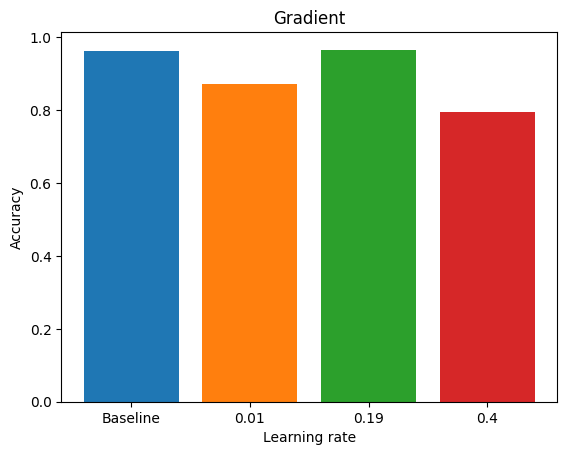

In [ ]:
#Gradient Boost

#Hyperparameter: learning rate
GB_learning_rate= []
GB_learning_rate.append(['Baseline', GB_update_baseline])
learning_list= [0.01,0.19,0.4]

for i in learning_list :
  GB_clf = GradientBoostingClassifier (learning_rate=i , random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)
  GB_learning_rate.append([f'{i}', accuracy_GB])

print(GB_learning_rate)
#Update baseline
GB_update_baseline = update_baseline(GB_learning_rate)
print("\nUpdated baseline accuracy = ", GB_update_baseline)

plotModels(GB_learning_rate, 'Gradient', 'Learning rate', 'Accuracy')

[['Baseline', 0.9656946826758147], ['200', 0.9625500285877644], ['50', 0.9502572898799314], ['10', 0.8730703259005146]]

Updated baseline accuracy =  0.9656946826758147


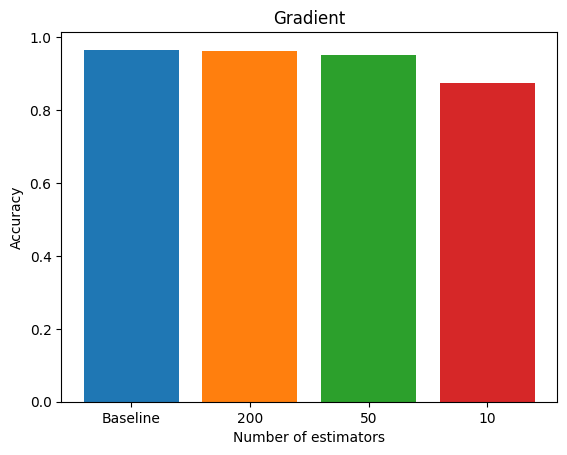

In [ ]:
#Hyperparameter: Number of estimators
GB_n_estimators= []
GB_n_estimators.append(['Baseline', GB_update_baseline])
n_estimators_list=[200,50,10]

for i in n_estimators_list :
  GB_clf = GradientBoostingClassifier (n_estimators=i , random_state=rs).fit(x_train, y_train)
  y_pred_GB = GB_clf.predict(x_test)
  accuracy_GB = accuracy_score(y_test,  y_pred_GB)
  GB_n_estimators.append([f'{i}', accuracy_GB])


print(GB_n_estimators)
#Update baseline
GB_update_baseline = gb_acc_3 = update_baseline(GB_n_estimators)
print("\nUpdated baseline accuracy = ", GB_update_baseline)

plotModels(GB_n_estimators, 'Gradient', 'Number of estimators', 'Accuracy')

(['Decision tree', 0.9213836477987422], ['Gradient boost', 0.9656946826758147])


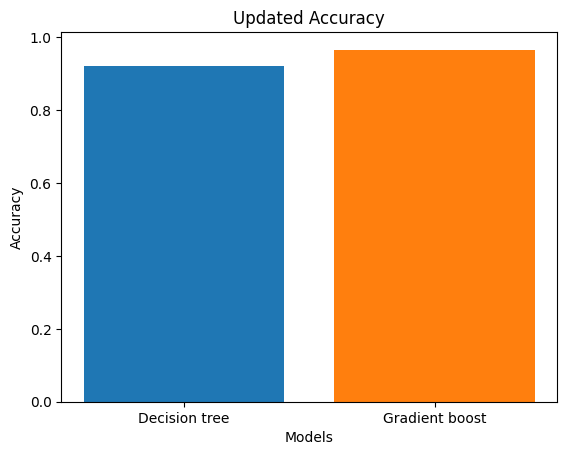

In [ ]:
#Plotting Final updated accuracies for the 3 models

Tuning_baseline=(['Decision tree',tree_update_baseline],['Gradient boost', GB_update_baseline])
print(Tuning_baseline)
plotModels(Tuning_baseline, 'Updated Accuracy', 'Models', 'Accuracy')

In [ ]:
#Stacking

from sklearn.ensemble import StackingClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

estimators = [
               ('Gradient Boost', GradientBoostingClassifier (learning_rate=0.19 ,n_estimators=100 ,max_depth=3 , random_state=rs)),
              ( 'Decision Tree', DecisionTreeClassifier(random_state=rs))
               ]

Stacking_clf = StackingClassifier(estimators=estimators).fit(x_train, y_train)
y_pred_stacking = Stacking_clf.predict(x_test)
accuracy_stacking = accuracy_score(y_test,  y_pred_stacking)
print("Accuracy = ", accuracy_stacking)

print("\n Stacking classification report :\n\n\n" ,metrics.classification_report(y_pred_stacking , y_test))

Accuracy =  0.9654088050314465

 Stacking classification report :


               precision    recall  f1-score   support

           0       0.94      1.00      0.97       344
           1       0.95      0.91      0.93       379
           2       0.99      0.95      0.97       379
           3       0.99      0.97      0.98       343
           4       0.99      0.99      0.99       367
           5       0.93      0.99      0.96       315
           6       1.00      1.00      1.00       336
           7       0.89      0.99      0.94       327
           8       1.00      0.93      0.96       360
           9       0.97      0.94      0.96       348

    accuracy                           0.97      3498
   macro avg       0.97      0.97      0.97      3498
weighted avg       0.97      0.97      0.97      3498



In [ ]:
#Random Forest

from sklearn.ensemble import RandomForestClassifier

RF_clf = RandomForestClassifier( random_state=rs).fit (x_train, y_train)
y_pred_RF = RF_clf.predict(x_test)
accuracy_RF = accuracy_score(y_test,  y_pred_RF)


accuracy_RF

0.9631217838765008

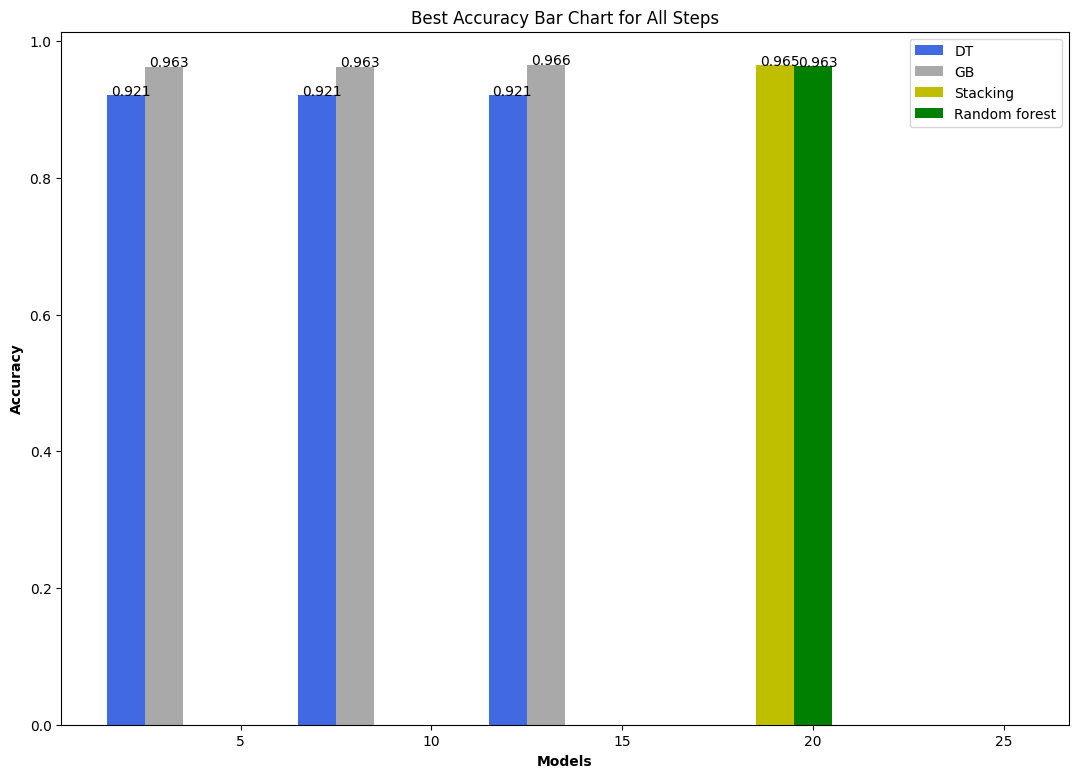

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
# Create bars
DT_bar = [tree_acc_1, tree_acc_2, tree_acc_3, 0,0]
GB_bar = [gb_acc_1, gb_acc_2, gb_acc_3, 0,0]
stacking_bar=[0,0,0,accuracy_stacking,0]
rf_bar=[0,0 ,0 ,  accuracy_RF ,0 ]

bars =   DT_bar + GB_bar + stacking_bar + rf_bar


plt.figure(figsize=(13,9))
# The X position of bars

r1 = [2,7,12,17,22]
r2 = [3,8,13,18,23]
r3 = [4,9,14,19,24]
r4= [5,10,15,20,25]
r = r1 + r2 + r3 + r4

# Create barplot
plt.bar(r1, DT_bar ,1,color='royalblue', label='DT')
plt.bar(r2, GB_bar, 1,color='darkgray', label='GB')
plt.bar(r3, stacking_bar,1,color='y', label='Stacking')
plt.bar(r4,rf_bar,1,color='green', label='Random forest')

#Create labels
#round(float_num, num_of_decimals)
label = [ round(tree_acc_1, 3), round(tree_acc_2, 3), round(tree_acc_3, 3), '','',
         round(gb_acc_1, 3), round(gb_acc_2, 3), round(gb_acc_3, 3),  '','',   '','','', round(accuracy_stacking, 3),'' ,'' ,'' ,'',round(accuracy_RF, 3) ,''  ]

#Text on the top of each bar
for i in range(len(r)):
    plt.text(x = r[i]-0.4, y = bars[i], s = label[i], size = 10)

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy', fontweight='bold')
plt.title("Best Accuracy Bar Chart for All Steps")
plt.legend(loc='best', bbox_to_anchor=(0.5, 0.5, 0.5, 0.5))

plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

Stacking confusion matrix is :

 [[343   0   0   0   0   0   0   0   1   0]
 [  0 346   3   3   0   0   0  24   0   3]
 [  0  15 360   0   0   0   0   4   0   0]
 [  0   1   0 332   0   5   0   1   0   4]
 [  0   1   0   0 362   0   0   4   0   0]
 [  0   0   0   0   1 313   1   0   0   0]
 [  0   0   0   0   1   0 335   0   0   0]
 [  0   1   1   0   0   0   0 324   0   1]
 [ 20   0   0   0   0   4   0   0 335   1]
 [  0   0   0   1   0  13   0   7   0 327]] 




<Axes: >

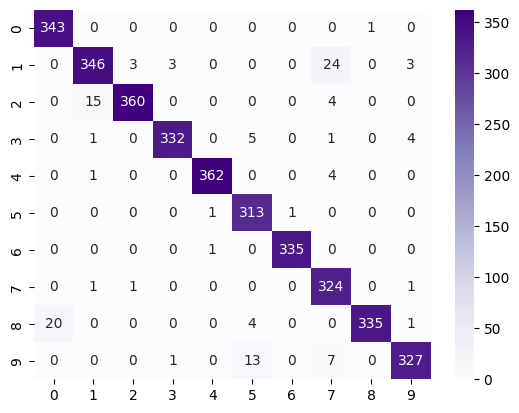

In [ ]:
#1- Stacking


print("Stacking confusion matrix is :\n\n" ,confusion_matrix(y_pred_stacking , y_test),"\n\n")

con=confusion_matrix(y_pred_stacking , y_test)

sn.heatmap(con,annot=True,cmap='Purples',fmt= 'd')